# <center>Covid-19 in South Korea (2020) EDA<center>

## <center>Introduction<center>

Welcome to the exploratory data analysis of Covid-19 in South Korea (2020). For this project, we imagine ourselves living in 2020, tasked with preparing a plan to combat Covid-19 using data collected in South Korea between January 20th and June 30th, 2020. The main goal of this project is to perform EDA to the extent that it provides valuable insights to create an effective plan proposition.

## <center>Used Libraries<center>

First off we need to install all the required packages to run this notebook. To do that just run the cell below. If need arises required packages list can be modified in **requirements.txt** file.

In [1]:
%%capture
%pip install -r requirements.txt

In this analysis, we employ three types of libraries. **Numpy** and **Pandas** serve for data manipulations, while **Matplotlib**, **Seaborn** and **Plotly**  are utilized for plotting. The **Warnings** library is solely employed to suppress non-meaningful warning messages and finaly **ipyleaflet** is used for map drawing.

In [2]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator
from ipyleaflet import Map, CircleMarker, basemaps

## <center>Load datasets<center>

For this analysis we are using **[NeurIPS 2020] Data Science for COVID-19 (DS4C)** dataset  that can be found on [Kaggle](https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset).

### <center>Case dataset<center>

In [4]:
case_data = pd.read_csv("datasets/Case.csv", index_col=False)
case_data.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


### <center> Patient info dataset <center>

In [5]:
patient_data = pd.read_csv("datasets/PatientInfo.csv", index_col=False)
patient_data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


### <center>Policy dataset<center>

In [6]:
policy_data = pd.read_csv("datasets/Policy.csv", index_col=False)
policy_data.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


### <center>Region dataset <center>

In [7]:
region_data = pd.read_csv("datasets/Region.csv", index_col=False)
region_data.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


### <center>Internet search trend dataset<center>

In [8]:
search_trend_data = pd.read_csv("datasets/SearchTrend.csv", index_col=False)
search_trend_data.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


### <center> Non-permanent residents dataset <center>

In [9]:
seoul_floating_population_data = pd.read_csv(
    "datasets/SeoulFloating.csv", index_col=False
)
seoul_floating_population_data.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


### <center> Testing timeline dataset <center>

In [10]:
time_data = pd.read_csv("datasets/Time.csv", index_col=False)
time_data.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


### <center>Timeline of spread by age dataset <center>

In [11]:
age_data = pd.read_csv("datasets/TimeAge.csv", index_col=False)
age_data.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


### <center>Timeline of spread by gender dataset <center>

In [12]:
gender_data = pd.read_csv("datasets/TimeGender.csv", index_col=False)
gender_data.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


### <center>Timeline of spread by province dataset <center>

In [13]:
province_data = pd.read_csv("datasets/TimeProvince.csv", index_col=False)
province_data.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


### <center> Weather dataset <center>

In [14]:
weather_data = pd.read_csv("datasets/Weather.csv", index_col=False)
weather_data.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


## <center>Data cleaning<center>

During data cleaning process we will check each dataset for null values, duplicates and datatypes. In some cases we will convert categorical data into numeric values that may be used in later ML inplementations.

### <center>Case dataset cleaning<center>

In [15]:
case_data.shape

(174, 8)

In [16]:
case_data.dtypes

 case_id           int64
province          object
city              object
group               bool
infection_case    object
confirmed          int64
latitude          object
longitude         object
dtype: object

In [17]:
case_data.isnull().sum()

 case_id          0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [18]:
case_data["city"] = case_data["city"].replace("-", "no information")
case_data[["latitude", "longitude"]] = (
    case_data[["latitude", "longitude"]].replace("-", -1).astype(float)
)

In [19]:
case_data_lowercased = case_data.applymap(
    lambda x: x.lower().strip() if isinstance(x, str) else x
)
unique_row_by_feature = case_data_lowercased.nunique()
unique_row_by_feature

 case_id          174
province           17
city               48
group               2
infection_case     81
confirmed          62
latitude           66
longitude          66
dtype: int64

In [20]:
case_data.duplicated().sum()

0

In [21]:
case_data.dtypes

 case_id            int64
province           object
city               object
group                bool
infection_case     object
confirmed           int64
latitude          float64
longitude         float64
dtype: object

In [22]:
case_data.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.482080,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


### <center>Patient info dataset cleaning <center>

In [23]:
patient_data.shape

(5165, 14)

In [24]:
patient_data.dtypes

patient_id             int64
sex                   object
age                   object
country               object
province              object
city                  object
infection_case        object
infected_by           object
contact_number        object
symptom_onset_date    object
confirmed_date        object
released_date         object
deceased_date         object
state                 object
dtype: object

In [25]:
patient_data.isnull().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [26]:
columns_to_fill_str = ["sex", "age", "city", "infection_case"]
patient_data[columns_to_fill_str] = (
    patient_data[columns_to_fill_str].fillna("Unknown").replace("etc", "Unknown")
)

In [27]:
columns_to_fill_int = ["infected_by", "contact_number"]

for column in columns_to_fill_int:
    patient_data[column] = patient_data[column].astype(str).str.split(",")
    patient_data = patient_data.explode(column, ignore_index=True)

patient_data[columns_to_fill_int] = patient_data[columns_to_fill_int].apply(
    pd.to_numeric, errors="coerce", downcast="integer"
)
patient_data[columns_to_fill_int] = patient_data[columns_to_fill_int].fillna(-1)
patient_data[columns_to_fill_int] = patient_data[columns_to_fill_int].astype(int)

In [28]:
column_to_fill_date = [
    "symptom_onset_date",
    "confirmed_date",
    "released_date",
    "deceased_date",
]
date_format = "%Y-%m-%d"
for column in column_to_fill_date:
    patient_data[column] = pd.to_datetime(
        patient_data[column], format=date_format, errors="coerce"
    )
patient_data[column_to_fill_date] = patient_data[column_to_fill_date].fillna(pd.NaT)

During patient data dataset cleaning there are few new values introduced or replaced. Etc value used in features represent something similar to "default" value, but some fields are still left empty. For that reason missing values are filled and "etc" is replaced by "Unknown". Other value introduced is -1. This value will be considered as "no information" and is used to fill missing values while keeping original datatypes of features. Similarly date datatype fields are filled with Nat (not a time) values, to keep original datatypes.

In [29]:
patient_data.isnull().sum()

patient_id               0
sex                      0
age                      0
country                  0
province                 0
city                     0
infection_case           0
infected_by              0
contact_number           0
symptom_onset_date    4477
confirmed_date           3
released_date         3579
deceased_date         5100
state                    0
dtype: int64

In [30]:
patient_data.dtypes

patient_id                     int64
sex                           object
age                           object
country                       object
province                      object
city                          object
infection_case                object
infected_by                    int32
contact_number                 int32
symptom_onset_date    datetime64[ns]
confirmed_date        datetime64[ns]
released_date         datetime64[ns]
deceased_date         datetime64[ns]
state                         object
dtype: object

In [31]:
patient_data.duplicated().sum()

0

In [32]:
patient_data.head(5)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,-1,75,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,-1,31,NaT,2020-01-30,2020-03-02,NaT,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaT,2020-01-30,2020-02-19,NaT,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,-1,9,2020-01-26,2020-01-30,2020-02-15,NaT,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaT,2020-01-31,2020-02-24,NaT,released


### <center> Policy dataset cleaning <center>

In [33]:
policy_data.shape

(61, 7)

In [34]:
policy_data.dtypes

policy_id      int64
country       object
type          object
gov_policy    object
detail        object
start_date    object
end_date      object
dtype: object

In [35]:
policy_data.isnull().sum()

policy_id      0
country        0
type           0
gov_policy     0
detail         2
start_date     0
end_date      37
dtype: int64

In [36]:
policy_data["detail"] = policy_data["detail"].fillna("Unknown")

In [37]:
policy_column_to_fill_date = ["start_date", "end_date"]
date_format = "%Y-%m-%d"
for column in policy_column_to_fill_date:
    policy_data[column] = pd.to_datetime(
        policy_data[column], format=date_format, errors="coerce"
    )
policy_data[policy_column_to_fill_date] = policy_data[
    policy_column_to_fill_date
].fillna(pd.NaT)

In [38]:
policy_data.duplicated().sum()

0

In [39]:
policy_data.tail(10)

,policy_id,country,type,gov_policy,detail,start_date,end_date
51,52,Korea,Technology,Self-Quarantine Safety Protection App,Unknown,2020-03-07,NaT
52,53,Korea,Technology,Electronic Wristbands,on people who violate self-quarantine measures,2020-04-27,NaT
53,54,Korea,Administrative,Close bars and clubs,administrative order to close bars and clubs,2020-05-08,2020-06-07
54,55,Korea,Administrative,local government Administrative orders,Gathering limited administrative orders for nu...,2020-05-16,NaT
55,56,Korea,Administrative,Close karaoke,Ban on gathering for 2 weeks for all karaoke a...,2020-05-21,2020-06-03
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaT
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaT
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaT
60,61,Korea,Health,Extends Tightened Quarantine Measures,Gov't Extends Tightened Quarantine Measures in...,2020-05-28,2020-06-14


### <center>Region dataset cleaning<center>

In [40]:
region_data.shape

(244, 12)

In [41]:
region_data.dtypes

code                          int64
province                     object
city                         object
latitude                    float64
longitude                   float64
elementary_school_count       int64
kindergarten_count            int64
university_count              int64
academy_ratio               float64
elderly_population_ratio    float64
elderly_alone_ratio         float64
nursing_home_count            int64
dtype: object

In [42]:
region_data_lowercased = region_data.applymap(
    lambda x: x.lower().strip() if isinstance(x, str) else x
)
unique_row_by_feature = region_data_lowercased.nunique()
unique_row_by_feature

code                        244
province                     18
city                        222
latitude                    243
longitude                   243
elementary_school_count      78
kindergarten_count          101
university_count             21
academy_ratio               144
elderly_population_ratio    229
elderly_alone_ratio         130
nursing_home_count          208
dtype: int64

In [43]:
region_data.duplicated().sum()

0

In [44]:
region_data.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


### <center> Internet search trend dataset cleaning <center>

In [45]:
search_trend_data.shape

(1642, 5)

In [46]:
search_trend_data.dtypes

date            object
cold           float64
flu            float64
pneumonia      float64
coronavirus    float64
dtype: object

In [47]:
search_trend_data.isnull().sum()

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

In [48]:
search_trend_data["date"] = pd.to_datetime(
    search_trend_data["date"], format=date_format, errors="coerce"
)

In [49]:
search_trend_data.dtypes

date           datetime64[ns]
cold                  float64
flu                   float64
pneumonia             float64
coronavirus           float64
dtype: object

In [50]:
search_trend_data.nunique()

date           1642
cold           1085
flu            1312
pneumonia      1184
coronavirus     417
dtype: int64

In [51]:
search_trend_data.duplicated().sum()

0

In [52]:
search_trend_data.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


### <center> Non-permanent residents dataset cleaning<center>

In [53]:
seoul_floating_population_data.shape

(1084800, 7)

In [54]:
seoul_floating_population_data.dtypes

date          object
hour           int64
birth_year     int64
sex           object
province      object
city          object
fp_num         int64
dtype: object

In [55]:
seoul_floating_population_data.isnull().sum()

date          0
hour          0
birth_year    0
sex           0
province      0
city          0
fp_num        0
dtype: int64

In [56]:
seoul_floating_population_data.nunique()

date            151
hour             24
birth_year        6
sex               2
province          1
city             25
fp_num        10669
dtype: int64

In [57]:
seoul_floating_population_data.duplicated().sum()

0

In [58]:
seoul_floating_population_data.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


### <center> Testing timeline dataset cleaning <center>

In [59]:
time_data.shape

(163, 7)

In [60]:
time_data.dtypes

date         object
time          int64
test          int64
negative      int64
confirmed     int64
released      int64
deceased      int64
dtype: object

In [61]:
time_data.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

In [62]:
time_data.duplicated().sum()

0

In [63]:
time_data["date"] = pd.to_datetime(
    time_data["date"], format=date_format, errors="coerce"
)
time_data.dtypes

date         datetime64[ns]
time                  int64
test                  int64
negative              int64
confirmed             int64
released              int64
deceased              int64
dtype: object

In [64]:
time_data.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


### <center>Timeline of spread by age dataset cleaning <center>

In [65]:
age_data.shape

(1089, 5)

In [66]:
age_data.dtypes

date         object
time          int64
age          object
confirmed     int64
deceased      int64
dtype: object

In [67]:
age_data.isnull().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [68]:
age_data.duplicated().sum()

0

In [69]:
age_data.nunique().sum

<bound method Series.sum of date         121
time           1
age            9
confirmed    827
deceased     107
dtype: int64>

We can notice that there is only 1 time value, which after cheking dataset turns out to be 0. Because this feature does not provide any information to us, it will be dropped.

In [70]:
age_data.drop(columns=["time"], inplace=True)

In [71]:
age_data["date"] = pd.to_datetime(age_data["date"], format=date_format, errors="coerce")
age_data.dtypes

date         datetime64[ns]
age                  object
confirmed             int64
deceased              int64
dtype: object

In [72]:
age_data.head()

,date,age,confirmed,deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1


### <center>Timeline of spread by gender dataset cleaning <center>

In [73]:
gender_data.shape

(242, 5)

In [74]:
gender_data.dtypes

date         object
time          int64
sex          object
confirmed     int64
deceased      int64
dtype: object

In [75]:
gender_data.isnull().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

In [76]:
gender_data.duplicated().sum()

0

In [77]:
gender_data.drop(columns=["time"], inplace=True)

We drop time feature from this dataset for same reasoning as in previous one.

In [78]:
gender_data["date"] = pd.to_datetime(
    gender_data["date"], format=date_format, errors="coerce"
)
gender_data.dtypes

date         datetime64[ns]
sex                  object
confirmed             int64
deceased              int64
dtype: object

In [79]:
gender_data.head()

,date,sex,confirmed,deceased
0,2020-03-02,male,1591,13
1,2020-03-02,female,2621,9
2,2020-03-03,male,1810,16
3,2020-03-03,female,3002,12
4,2020-03-04,male,1996,20


### <center>Timeline of spread by province dataset cleaning <center>

In [80]:
province_data.shape

(2771, 6)

In [81]:
province_data.dtypes

date         object
time          int64
province     object
confirmed     int64
released      int64
deceased      int64
dtype: object

In [82]:
province_data.isnull().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

In [83]:
province_data.duplicated().sum()

0

In [84]:
province_data.nunique()

date         163
time           2
province      17
confirmed    544
released     507
deceased     104
dtype: int64

Like in datasets before time feature has few values and provide no usefull insight, but because there is more than 1 value, feature is not dropped.

In [85]:
province_data["date"] = pd.to_datetime(
    province_data["date"], format=date_format, errors="coerce"
)
province_data.dtypes

date         datetime64[ns]
time                  int64
province             object
confirmed             int64
released              int64
deceased              int64
dtype: object

In [86]:
province_data.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


### <center> Weather dataset cleaning <center>

In [87]:
weather_data.shape

(26271, 10)

In [88]:
weather_data.dtypes

code                       int64
province                  object
date                      object
avg_temp                 float64
min_temp                 float64
max_temp                 float64
precipitation            float64
max_wind_speed           float64
most_wind_direction      float64
avg_relative_humidity    float64
dtype: object

In [89]:
rows_with_nulls = weather_data[weather_data.isnull().any(axis=1)]
rows_with_nulls

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
5693,60000,Gyeongsangbuk-do,2016-12-21,NaN,4.2,15.4,10.0,3.3,NaN,NaN
5784,30000,Gangwon-do,2016-12-27,1.0,-2.5,4.3,23.0,4.5,NaN,85.4
5800,30000,Gangwon-do,2016-12-28,0.5,-4.0,5.8,0.0,5.6,NaN,54.9
6861,60000,Gyeongsangbuk-do,2017-03-04,NaN,2.2,14.7,0.0,6.0,50.0,47.3
9197,60000,Gyeongsangbuk-do,2017-07-28,NaN,19.2,28.9,14.5,3.9,NaN,NaN
9202,12000,Daegu,2017-07-29,NaN,21.5,26.2,30.0,5.2,140.0,91.3
9757,60000,Gyeongsangbuk-do,2017-09-01,20.3,15.0,25.7,0.0,7.9,NaN,66.6
10400,10000,Seoul,2017-10-12,11.4,8.8,NaN,0.0,4.5,270.0,71.0
10432,10000,Seoul,2017-10-14,14.4,9.0,20.5,0.0,NaN,NaN,42.8
11083,50000,Jeollabuk-do,2017-11-23,2.4,NaN,5.4,2.6,4.8,90.0,76.3


In [90]:
columns_to_fill_weather = [
    "avg_temp",
    "min_temp",
    "max_temp",
    "precipitation",
    "max_wind_speed",
    "most_wind_direction",
    "avg_relative_humidity",
]
weather_data[columns_to_fill_weather] = weather_data[columns_to_fill_weather].fillna(
    1000
)

In [91]:
weather_data["date"] = pd.to_datetime(
    weather_data["date"], format=date_format, errors="coerce"
)
weather_data.dtypes

code                              int64
province                         object
date                     datetime64[ns]
avg_temp                        float64
min_temp                        float64
max_temp                        float64
precipitation                   float64
max_wind_speed                  float64
most_wind_direction             float64
avg_relative_humidity           float64
dtype: object

In [92]:
weather_data.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


## <center> Exploratory Data analysis <center>

During the exploratory data analysis, there were many experiments conducted with the data. However, only the data that provides valuable insights has been retained for this project.

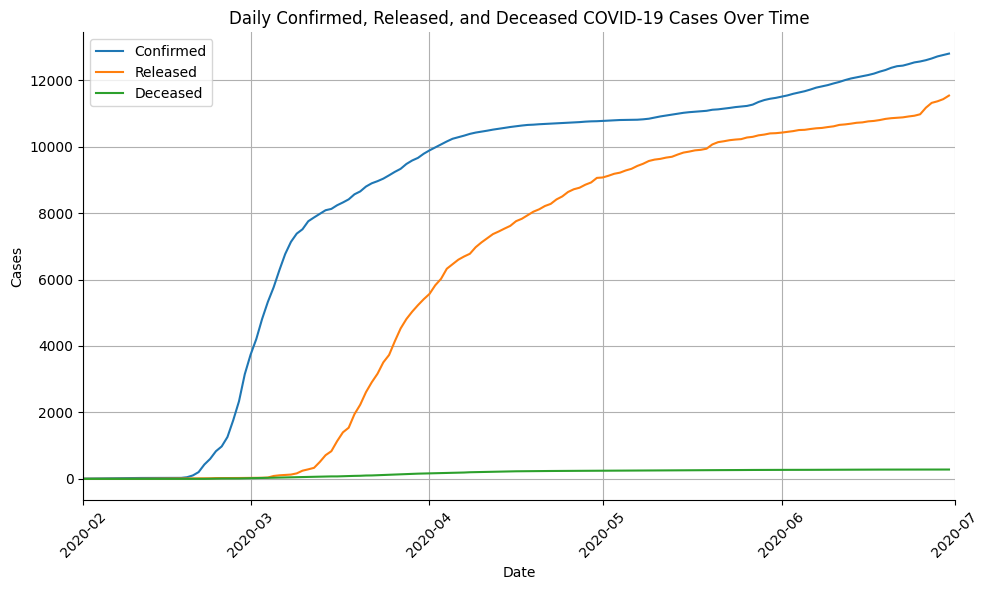

In [93]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_data, x="date", y="confirmed", label="Confirmed")
sns.lineplot(data=time_data, x="date", y="released", label="Released")
sns.lineplot(data=time_data, x="date", y="deceased", label="Deceased")
plt.title("Daily Confirmed, Released, and Deceased COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.xlim(pd.Timestamp("2020-02-01"), pd.Timestamp("2020-07-01"))
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

As we can observe from this graph, the overall mortality rate among individuals who contracted COVID-19 is relatively low. Additionally, it is evident that the counts of confirmed and released cases over time show a semi-parallel trend, converging towards the end. This suggests that initially, the average recovery period was longer, but over time, a majority of individuals recovered.

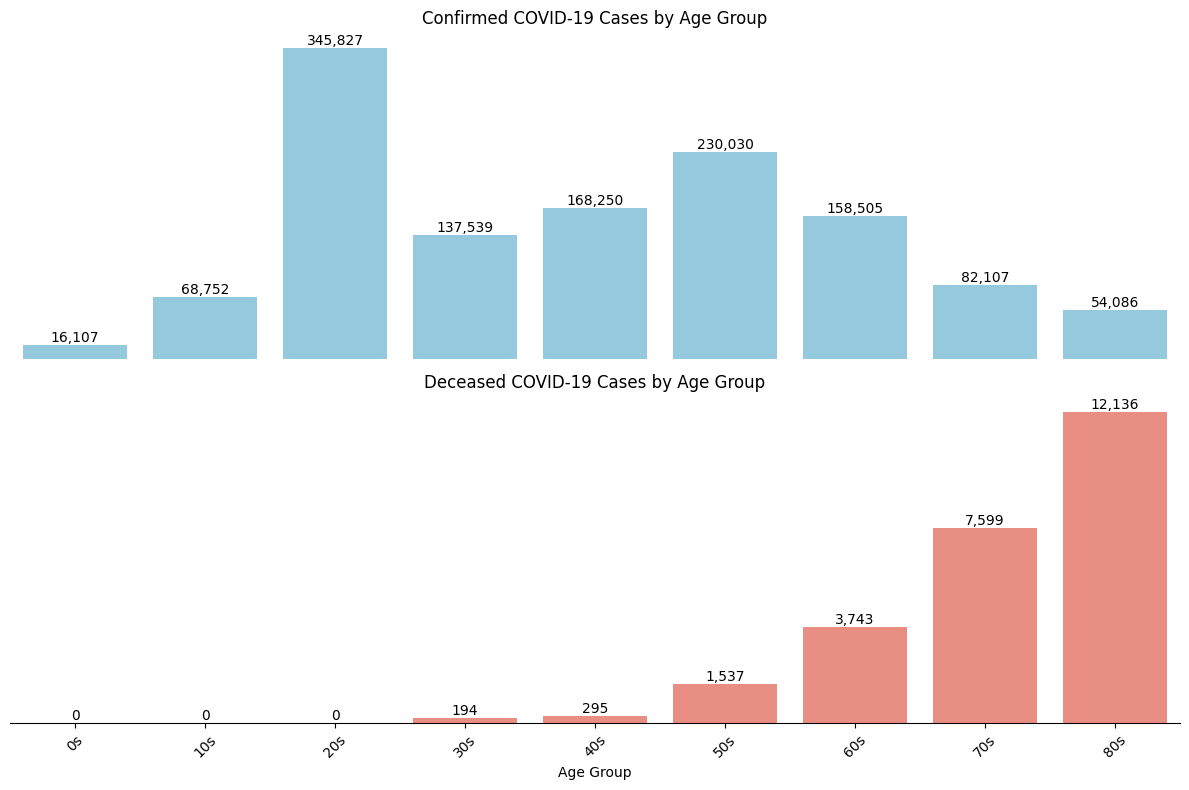

In [94]:
timeage_data = age_data[age_data["age"] != "unknown"]

age_group_data = (
    timeage_data.groupby("age")
    .agg({"confirmed": "sum", "deceased": "sum"})
    .reset_index()
)

age_order = ["0s", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s"]
age_group_data["age"] = pd.Categorical(
    age_group_data["age"], categories=age_order, ordered=True
)
age_group_data.sort_values("age", inplace=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

sns.barplot(data=age_group_data, x="age", y="confirmed", ax=ax1, color="skyblue")
ax1.xaxis.set_visible(False)
ax1.spines["bottom"].set_color("none")
ax1.spines["left"].set_color("none")
ax1.set_title("Confirmed COVID-19 Cases by Age Group")
ax1.set_ylabel("")

for bar in ax1.patches:
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height()):,}",
        ha="center",
        va="bottom",
    )

sns.barplot(data=age_group_data, x="age", y="deceased", ax=ax2, color="salmon")
ax2.spines["left"].set_color("none")
ax2.set_title("Deceased COVID-19 Cases by Age Group")
ax2.set_ylabel("")
ax2.set_xlabel("Age Group")

for bar in ax2.patches:
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height()):,}",
        ha="center",
        va="bottom",
    )

plt.xticks(rotation=45)
ax1.yaxis.set_ticks([])
ax2.yaxis.set_ticks([])
sns.despine()

plt.tight_layout()
plt.show()

From this graph, it's evident that although the majority of confirmed cases are among younger individuals, their mortality rate is extremely low. However, when examining the older population, we observe a significant increase in mortality rates, indicating that this virus poses a grave risk to older individuals.

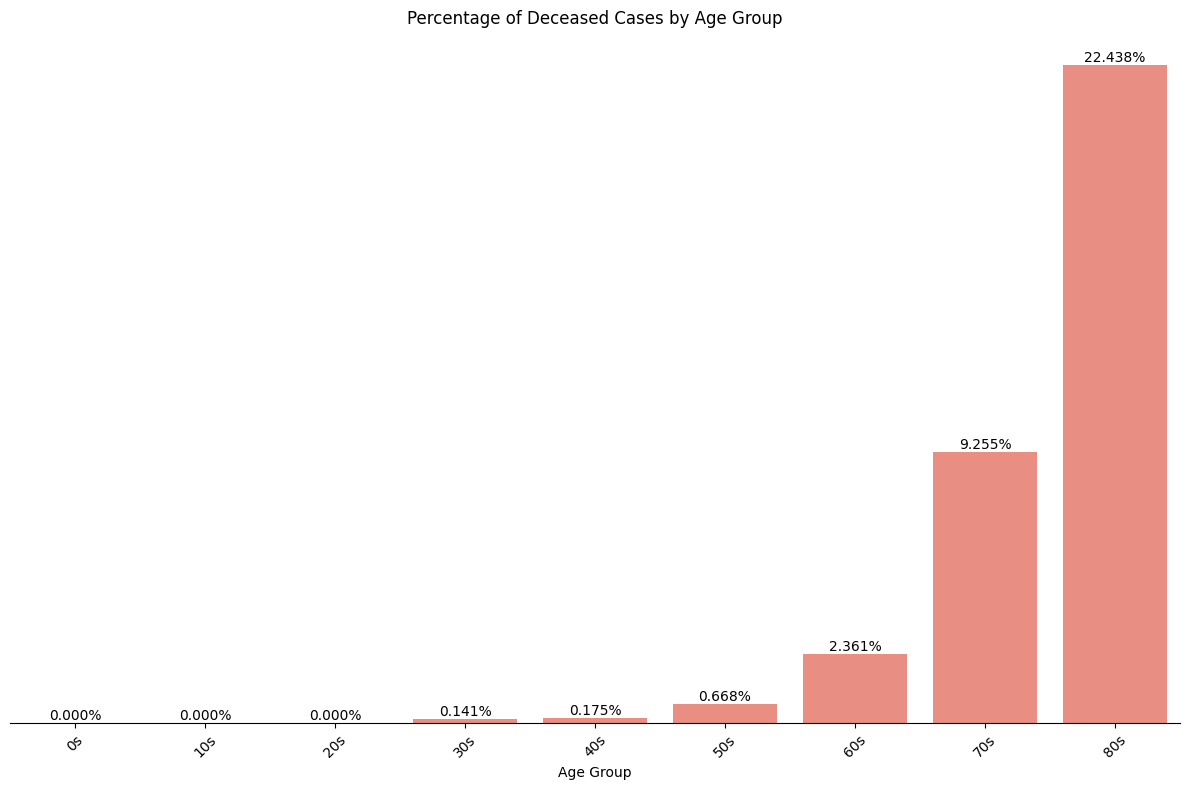

In [95]:
age_group_data["deceased_percentage"] = (
    age_group_data["deceased"] / (age_group_data["confirmed"])
) * 100

plt.figure(figsize=(12, 8))
bars = sns.barplot(
    data=age_group_data, x="age", y="deceased_percentage", color="salmon"
)

sns.despine(left=True)
plt.yticks([])

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.3f}%",
        ha="center",
        va="bottom",
    )

plt.title("Percentage of Deceased Cases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Just to emphasize the risk for the older population, it's notable that individuals in their 80s have almost a 1 in 4 chance of mortality after contracting COVID-19.

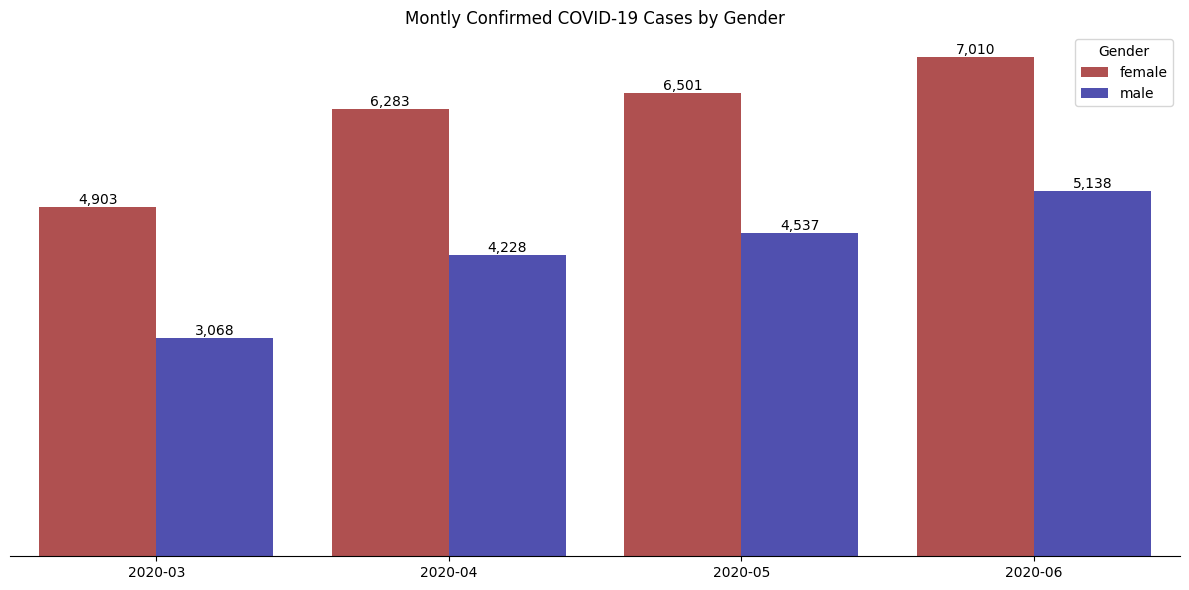

In [96]:
grouped_gender_data = gender_data.groupby(["date", "sex"])["confirmed"].sum().reset_index()
grouped_gender_data["month"] = grouped_gender_data["date"].dt.strftime("%Y-%m")

custom_palette = {
    "male": sns.desaturate("blue", 0.5),
    "female": sns.desaturate("red", 0.5),
}
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x="month",
    y="confirmed",
    hue="sex",
    data=grouped_gender_data,
    palette=custom_palette,
    dodge=True,
    ci=None,
)

sns.despine()
bars.spines["left"].set_visible(False)

bars.tick_params(axis="y", which="both", left=False, labelleft=False)

for bar in bars.patches:
    if bar.get_height() > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{int(bar.get_height()):,}",
            ha="center",
            va="bottom",
        )

plt.title("Montly Confirmed COVID-19 Cases by Gender")
plt.xlabel("")
plt.ylabel("")

plt.legend(title="Gender", loc="upper right")
plt.tight_layout()

plt.show()

In [97]:
total_confirmed_women = grouped_gender_data[grouped_gender_data["sex"] == "female"]["confirmed"].sum()
total_confirmed_men = grouped_gender_data[grouped_gender_data["sex"] == "male"]["confirmed"].sum()

ratio_women_to_men = total_confirmed_women / total_confirmed_men

print("Ratio of Women to Men:", ratio_women_to_men)

Ratio of Women to Men: 1.4549887391552323


Now that we have established age's influence on the ability to recover from COVID-19, we can check the influence of sex. As we can see from the graph, women are about 1.4 times more susceptible to the virus than men.

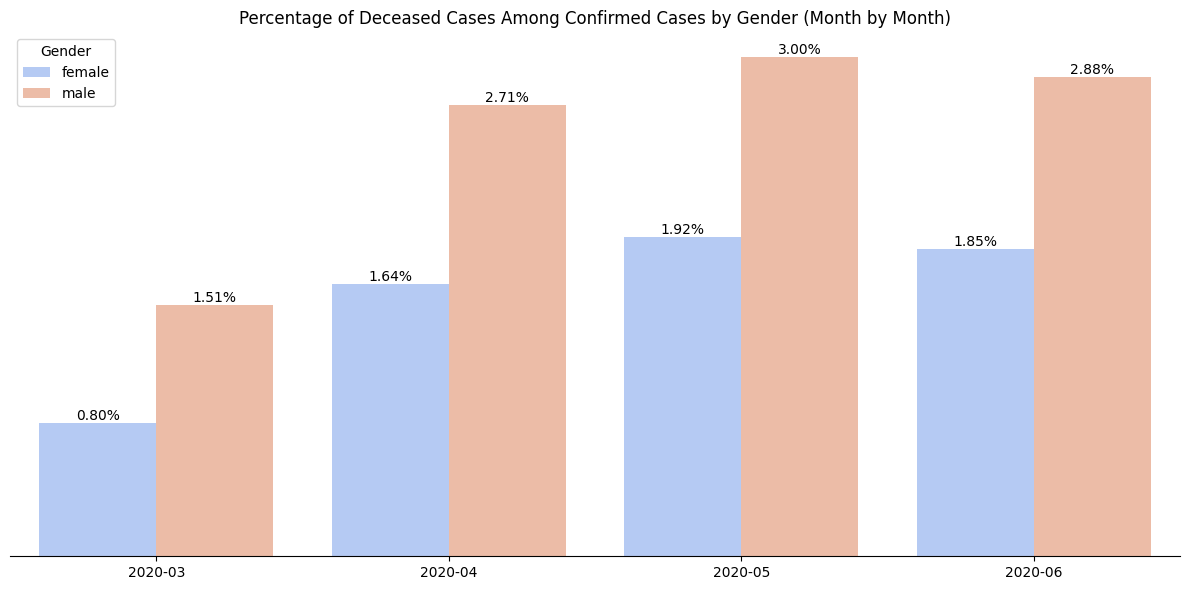

In [98]:
gender_data["date"] = pd.to_datetime(gender_data["date"])
gender_data["month_year"] = gender_data["date"].dt.to_period("M")

grouped_gender_data = (
    gender_data.groupby(["sex", "month_year"])
    .agg({"confirmed": "sum", "deceased": "sum"})
    .reset_index()
)

grouped_gender_data["deceased_percentage"] = (
    grouped_gender_data["deceased"] / grouped_gender_data["confirmed"]
) * 100

unique_months = grouped_gender_data["month_year"].unique()

grouped_gender_data["month_year"] = pd.Categorical(
    grouped_gender_data["month_year"], categories=unique_months, ordered=True
)

plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x="month_year",
    y="deceased_percentage",
    hue="sex",
    data=grouped_gender_data,
    palette="coolwarm",
)

plt.ylabel("")
plt.xlabel("")
plt.yticks([])

for bar in bars.patches:
    if bar.get_height() > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{bar.get_height():.2f}%",
            ha="center",
            va="bottom",
        )

sns.despine(left=True)

plt.title(
    "Percentage of Deceased Cases Among Confirmed Cases by Gender (Month by Month)"
)
plt.legend(title="Gender", loc="upper left")
plt.tight_layout()
plt.show()

Even though women are more susceptible to the virus, from this graph, we can see that men have a considerably higher mortality rate.

Now that we have a basic idea about people's susceptibility to virus, let's examine people awareness.

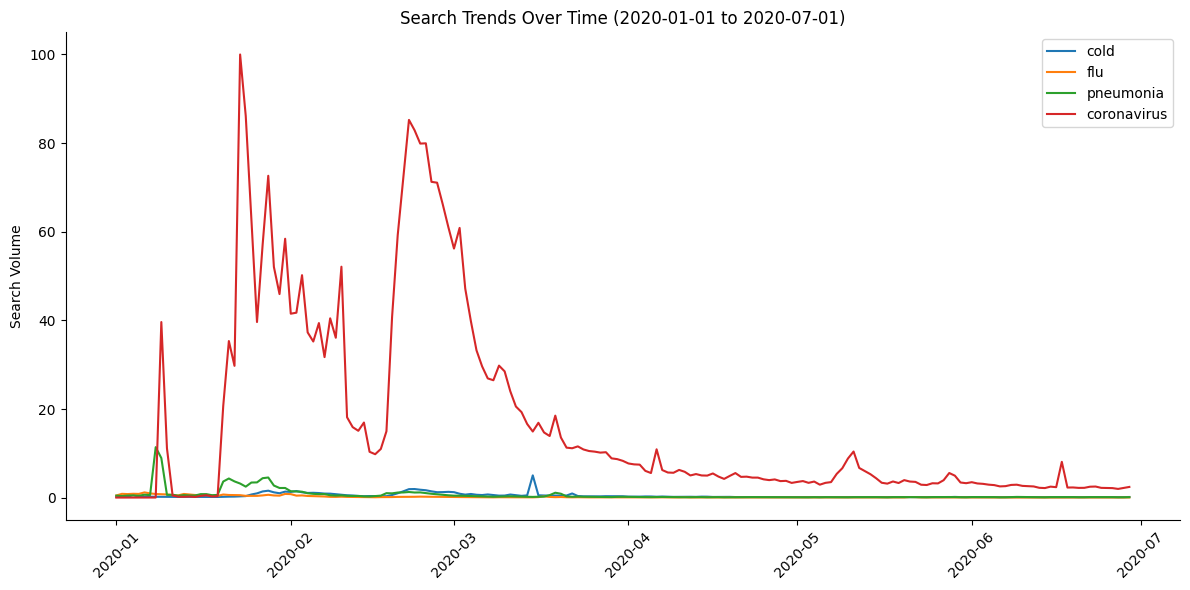

In [99]:
filtered_data = search_trend_data[
    (search_trend_data["date"] >= "2020-01-01")
    & (search_trend_data["date"] <= "2020-07-01")
]

plt.figure(figsize=(12, 6))
for column in filtered_data.columns[1:]:
    plt.plot(filtered_data["date"], filtered_data[column], label=column)

plt.title("Search Trends Over Time (2020-01-01 to 2020-07-01)")
plt.xlabel("")
plt.ylabel("Search Volume")
plt.xticks(rotation=45)
sns.despine()
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

As we can see, searches related to the coronavirus skyrocketed around the same time as the infectious wave hit. This indicates that people were aware of what was happening during that timeframe.

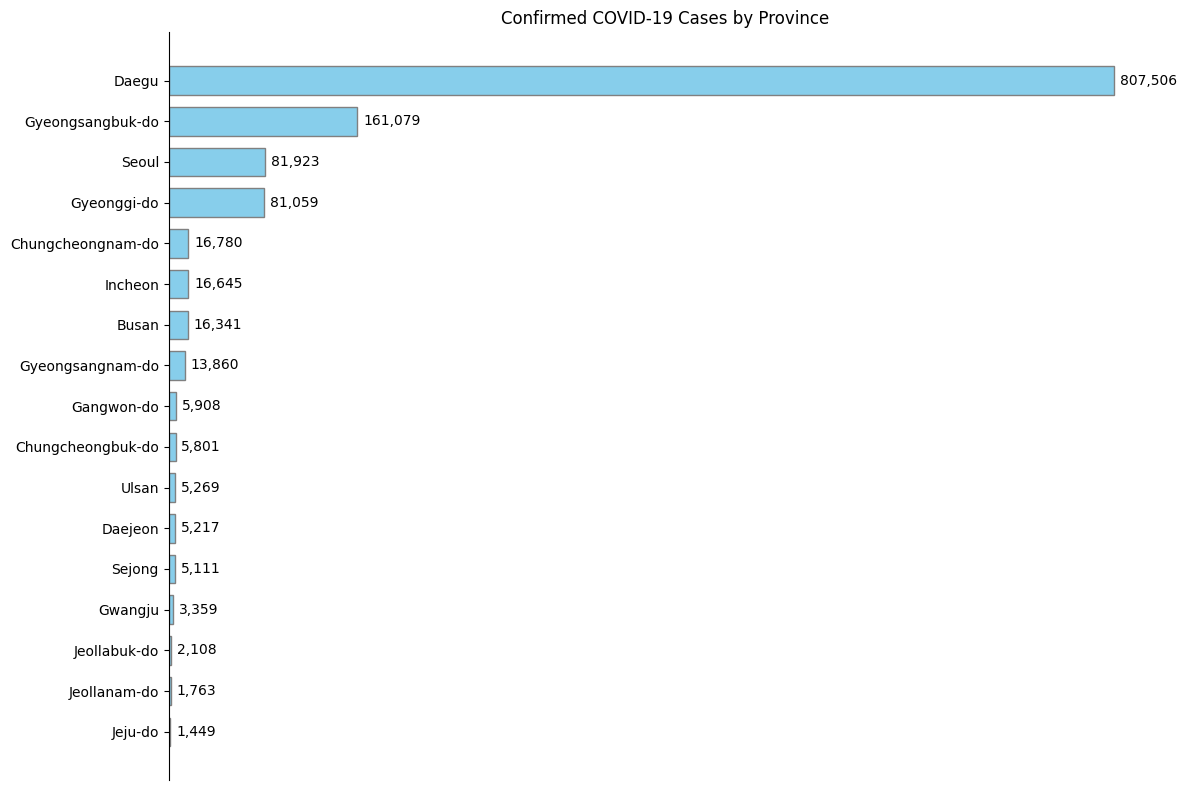

In [100]:
province_data_sum = (
    province_data.groupby("province")
    .agg({"confirmed": "sum", "deceased": "sum"})
    .reset_index()
)
province_data_filtered = province_data_sum[province_data_sum["confirmed"] > 0]
province_data_sorted = province_data_filtered.sort_values(
    by="confirmed", ascending=True
)

plt.figure(figsize=(12, 8))
bar_height = 0.7
r = range(len(province_data_sorted))
bars_confirmed = plt.barh(
    r,
    province_data_sorted["confirmed"],
    color="skyblue",
    height=bar_height,
    edgecolor="grey",
    label="Confirmed Cases",
)

plt.xlabel("")
plt.ylabel("")
plt.title("Confirmed COVID-19 Cases by Province")
plt.yticks(r, province_data_sorted["province"])

for bar in bars_confirmed:
    plt.text(
        bar.get_width() + 5000,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width()):,}",
        ha="left",
        va="center",
    )

sns.despine()
plt.gca().spines["bottom"].set_visible(False)
plt.gca().tick_params(axis="x", which="both", bottom=False, labelbottom=False)

plt.tight_layout()
plt.show()

It's evident from the data that there was a significant and abnormal surge in infectious cases within the Daegu region. This alarming trend underscores the urgency for thorough investigation to ascertain the root cause of this outbreak.

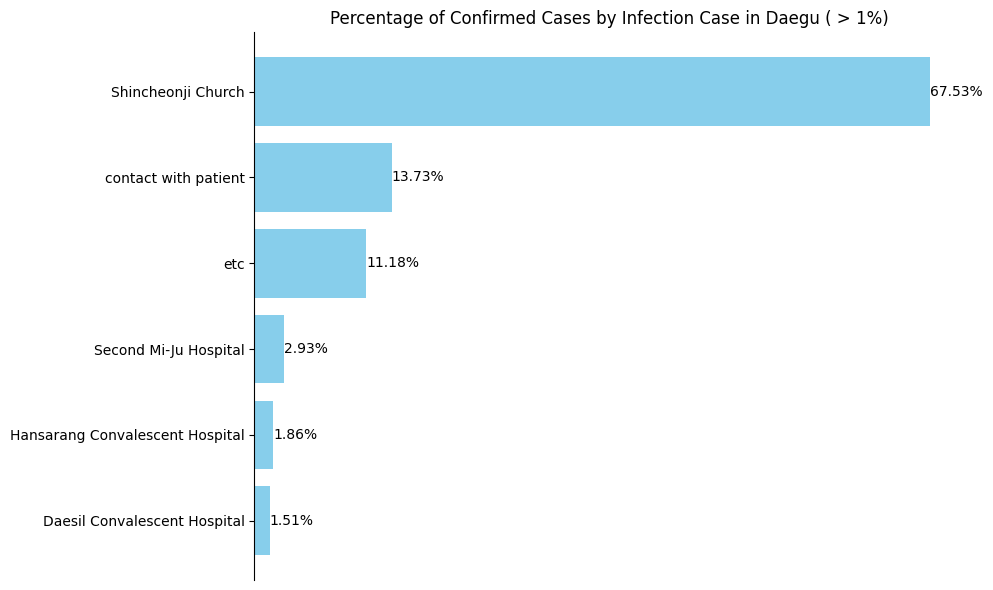

In [101]:
daegu_cases = case_data[case_data["province"] == "Daegu"]
infection_cases = daegu_cases.groupby("infection_case")["confirmed"].sum().reset_index()
total_cases = infection_cases["confirmed"].sum()
infection_cases["percentage"] = (infection_cases["confirmed"] / total_cases) * 100
infection_cases = infection_cases[infection_cases["percentage"] > 1]
infection_cases_sorted = infection_cases.sort_values(by="percentage", ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    infection_cases_sorted["infection_case"],
    infection_cases_sorted["percentage"],
    color="skyblue",
)

for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}%",
        va="center",
    )

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.xticks([])

plt.title("Percentage of Confirmed Cases by Infection Case in Daegu ( > 1%)")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

Indeed, it appears that the primary cause of the outbreak was the public gatherings held at the Shincheonji Church. This underscores the highly infectious nature of the virus, particularly in crowded settings where people gather closely together. Such findings highlight the importance of implementing measures to mitigate the spread of the virus in similar environments.

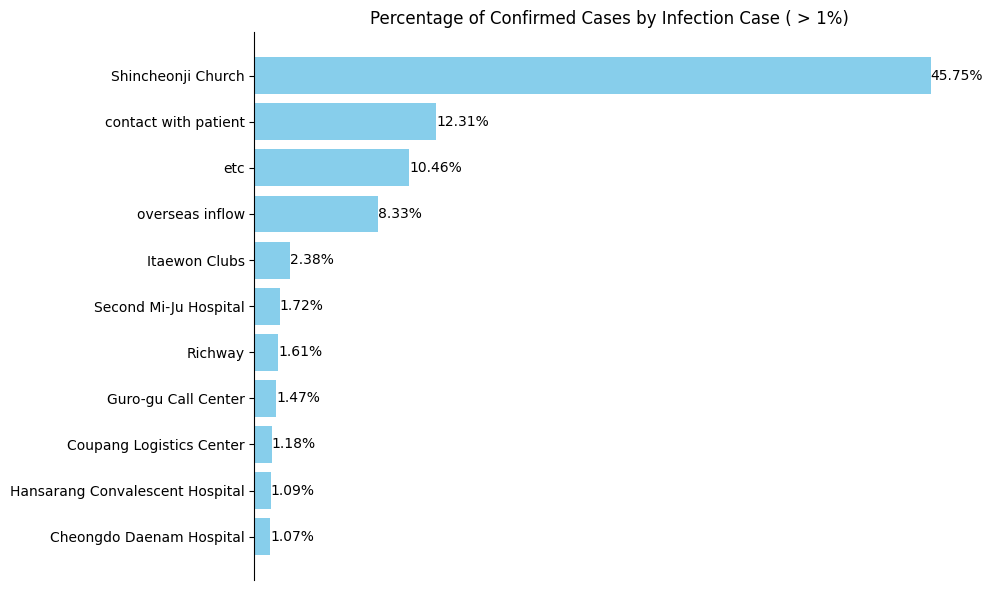

In [102]:
infection_cases = case_data.groupby("infection_case")["confirmed"].sum().reset_index()
total_cases = infection_cases["confirmed"].sum()
infection_cases["percentage"] = (infection_cases["confirmed"] / total_cases) * 100
infection_cases = infection_cases[infection_cases["percentage"] > 1]
infection_cases_sorted = infection_cases.sort_values(by="percentage", ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    infection_cases_sorted["infection_case"],
    infection_cases_sorted["percentage"],
    color="skyblue",
)

for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}%",
        va="center",
    )

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.xticks([])

plt.title("Percentage of Confirmed Cases by Infection Case ( > 1%)")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

As previously observed in Daegu province, this trend is also evident on a national scale. The graph underscores that there exists approximately a 12 percent probability of contracting the virus while serving as a first responder. Furthermore, it highlights the substantial contribution of overseas inflows to the total infection count. These findings emphasize the imperative of rigorous surveillance and proportional restrictions on international travel to curb the spread of the virus effectively.

In [103]:
south_korea_center = (
    36.6382,
    127.6962,
)  # Latitude and longitude coordinates of South Korea

filtered_data = case_data[case_data["confirmed"] > 0]

map_eng = Map(center=south_korea_center, zoom=7, basemap=basemaps.Esri.WorldTopoMap)

for index, row in filtered_data.iterrows():
    radius = int(row["confirmed"] * 0.005)  # Adjust the scaling factor as needed
    circle_marker = CircleMarker(
        location=(row["latitude"], row["longitude"]),
        radius=radius,
        color="blue",
        fill_color="blue",
        fill_opacity=0.6,
        draggable=False,
        tooltip=f"{row['infection_case']} - {row['confirmed']} confirmed cases",
    )
    map_eng.add_layer(circle_marker)

map_eng

Map(center=[36.6382, 127.6962], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

## <center> Conclusion <center>

In conclusion, our analysis has provided valuable insights into the dynamics of the COVID-19 pandemic, shedding light on various factors influencing its spread and impact. From the low overall mortality rate among younger individuals to the heightened risk faced by the elderly population, it is evident that age plays a significant role in determining susceptibility and outcomes. Additionally, gender disparities in susceptibility and mortality rates highlight the need for targeted interventions and healthcare strategies.

The surge in cases observed in Daegu, attributed to public gatherings, underscores the importance of stringent measures to prevent transmission in high-risk settings. Moreover, the role of international travel in contributing to infections emphasizes the necessity of robust surveillance and travel restrictions to contain the spread.

## <center> Pandemic fight plan <center>

**Targeted Healthcare Interventions:**<br>

* Allocate resources based on insights into age-related vulnerability. Focus on enhancing healthcare support for elderly populations, including dedicated treatment centers and home care services.<br>
* Provide specialized training for healthcare workers to address the specific needs of different age groups and prioritize vaccination for older individuals.<br>

**Enhanced Surveillance and Contact Tracing:**<br>

* Utilize data-driven approaches to prioritize testing and contact tracing efforts. Focus on identifying and isolating cases among younger individuals to prevent transmission to vulnerable populations.<br>
* Implement targeted testing strategies in regions with high rates of public gatherings or known outbreak clusters, such as the Shincheonji Church in Daegu.<br>

**Public Awareness Campaigns:**<br>

* Develop tailored public health messages based on gender-specific susceptibility and mortality rates. Highlight the importance of preventive measures and early detection, particularly among high-risk demographics.<br>
* Leverage insights into search trends to optimize the timing and content of awareness campaigns, ensuring maximum reach and impact during periods of heightened public concern.<br>

**Strategic Restrictions and Interventions:**<br>

* Implement localized restrictions in areas with significant overseas inflows, focusing on quarantine measures and border controls to prevent the introduction of new variants.
* Target interventions at first responder populations, including priority access to PPE, vaccination, and mental health support to mitigate the impact of high infection rates.<br>

**Data-Driven Policy Decisions:**<br>

* Establish a centralized data repository for ongoing analysis of pandemic trends and epidemiological data. Use insights to inform policy decisions on resource allocation, public health measures, and vaccination strategies.<br>
* Invest in research and surveillance capabilities to monitor the emergence of new variants and adapt response strategies accordingly, ensuring flexibility and agility in the face of evolving threats.